# Graph of words

Given a sequence of words $s_1,...s_m$, we perform a $n-gram$


$\color{red}{\text{NOTE}}$: Having retrived the data obtained in the data (X,Y) in the subfolder of `universal isotropic embedding` foler, you may skip till the Neural Network part.

## 1. Data processing 
w.l.o.g. we use a corpora using all words in the input txt.

### 1.1. Data Cleaning 

In [0]:
import collections
from operator import itemgetter
import re
import nltk
import numpy as np
from nltk.corpus import stopwords                                  
from itertools import permutations
import matplotlib.pyplot as plt
import word2vec
import pandas as pd
from numpy import save


I:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
text_content = open('test.txt', encoding = 'utf-8', errors = 'ignore').read()
text_content

'\nI heartily accept the motto,—“That government is best which governs least;” and I should like to see it acted up to more rapidly and systematically. Carried out, it finally amounts to this, which also I believe—“That government is best which governs not at all;” and when men are prepared for it, that will be the kind of government which they will have. Government is at best but an expedient; but most governments are usually, and all governments are sometimes, inexpedient. The objections which have been brought against a standing army, and they are many and weighty, and deserve to prevail, may also at last be brought against a standing government. The standing army is only an arm of the standing government. The government itself, which is only the mode which the people have chosen to execute their will, is equally liable to be abused and perverted before the people can act through it. Witness the present Mexican war, the work of comparatively a few individuals using the standing gove

In [0]:
# preprocess 
cleaned_texts = []
regex = re.compile('[^a-zA-Z]') # filter only letters
for innerText in text_content:
    cleaned_texts.append(regex.sub(' ', innerText))  

# convert into lowercase
for index in range(0, len(cleaned_texts)):
    cleaned_texts[index] = cleaned_texts[index].lower()
cleaned_texts = ''.join(cleaned_texts) # convert back to str

In [0]:
cleaned_texts

' i heartily accept the motto   that government is best which governs least   and i should like to see it acted up to more rapidly and systematically  carried out  it finally amounts to this  which also i believe  that government is best which governs not at all   and when men are prepared for it  that will be the kind of government which they will have  government is at best but an expedient  but most governments are usually  and all governments are sometimes  inexpedient  the objections which have been brought against a standing army  and they are many and weighty  and deserve to prevail  may also at last be brought against a standing government  the standing army is only an arm of the standing government  the government itself  which is only the mode which the people have chosen to execute their will  is equally liable to be abused and perverted before the people can act through it  witness the present mexican war  the work of comparatively a few individuals using the standing gover

### 1.2. Data Encoding 
We encode the input text into a list of vertex (word) index
- `inverted_index` has word as key and the vertex index as value 
- `vertex_list` has the coresponding word of the vertex index 

In [0]:
def tokenize(text):
    """
    Will split a text into words and remove stop words
    :param text: string - can be a document or a query
    :return: list - a list of words
    """
    words = None
    # the text into a sequence of words and store it in words
    words = text.split()
    
    # # remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    
    return words

In [0]:
def index(cleaned_texts):
    """
    use a dictionary (HashMap) for storing the inverted index
    key: word
    value: index of the word (vertx number) in the vertex list 
    """
    split_texts = tokenize(cleaned_texts) 
    inverted_index = {}
    split_text_set = set(split_texts)
    vertex_list = []
    for index, word in enumerate(split_text_set):
            inverted_index[word] = inverted_index.get(word, [])
            inverted_index[word].append(index)
            vertex_list.append(word)
    return inverted_index, vertex_list, split_texts


In [0]:
inverted_index, vertex_list,split_texts = index(cleaned_texts)
inverted_index

{'perverted': [0],
 'standing': [1],
 'satisfy': [2],
 'obstructions': [3],
 'unimpaired': [4],
 'use': [5],
 'expedient': [6],
 'abused': [7],
 'india': [8],
 'sort': [9],
 'systematically': [10],
 'hear': [11],
 'putting': [12],
 'comparatively': [13],
 'excellent': [14],
 'obstacles': [15],
 'successfully': [16],
 'mode': [17],
 'necessary': [18],
 'machinery': [19],
 'bend': [20],
 'intentions': [21],
 'amounts': [22],
 'consented': [23],
 'american': [24],
 'see': [25],
 'people': [26],
 'using': [27],
 'chosen': [28],
 'surely': [29],
 'show': [30],
 'man': [31],
 'another': [32],
 'heartily': [33],
 'living': [34],
 'character': [35],
 'actions': [36],
 'fain': [37],
 'judge': [38],
 'earnest': [39],
 'accept': [40],
 'work': [41],
 'many': [42],
 'would': [43],
 'endeavoring': [44],
 'integrity': [45],
 'idea': [46],
 'governments': [47],
 'railroads': [48],
 'commerce': [49],
 'alacrity': [50],
 'advantage': [51],
 'classed': [52],
 'manage': [53],
 'also': [54],
 'like': [55]

In [0]:
len(inverted_index)


153

In [0]:
# encode the tokenized txt into its vertex number 
decoded_texts = [inverted_index[word][0] for word in split_texts]
print(len(decoded_texts))
decoded_texts

206


[33,
 40,
 144,
 146,
 149,
 123,
 73,
 55,
 25,
 74,
 86,
 10,
 136,
 130,
 22,
 54,
 145,
 146,
 149,
 123,
 128,
 129,
 85,
 146,
 146,
 149,
 6,
 47,
 137,
 47,
 147,
 66,
 99,
 126,
 1,
 134,
 42,
 152,
 83,
 72,
 105,
 54,
 127,
 126,
 1,
 146,
 1,
 134,
 115,
 1,
 146,
 146,
 17,
 26,
 28,
 98,
 76,
 58,
 7,
 0,
 26,
 125,
 61,
 139,
 140,
 106,
 41,
 13,
 75,
 27,
 1,
 146,
 150,
 95,
 26,
 43,
 23,
 119,
 24,
 146,
 142,
 84,
 93,
 68,
 44,
 109,
 4,
 62,
 77,
 63,
 45,
 111,
 108,
 121,
 34,
 31,
 121,
 31,
 20,
 9,
 148,
 94,
 26,
 90,
 5,
 39,
 107,
 68,
 29,
 70,
 131,
 18,
 26,
 116,
 124,
 19,
 11,
 143,
 2,
 46,
 146,
 47,
 30,
 100,
 16,
 128,
 59,
 69,
 118,
 51,
 14,
 116,
 138,
 113,
 146,
 151,
 57,
 104,
 50,
 87,
 92,
 103,
 91,
 112,
 80,
 132,
 120,
 35,
 117,
 24,
 26,
 135,
 56,
 43,
 135,
 82,
 146,
 147,
 87,
 92,
 146,
 6,
 128,
 43,
 37,
 101,
 60,
 68,
 32,
 67,
 81,
 6,
 79,
 65,
 67,
 97,
 49,
 71,
 8,
 114,
 43,
 151,
 53,
 141,
 15,
 122,
 78,
 12,
 

## 2. Graph of words

Given a sequence of words $s_1,...s_m$, we perform a $n-gram$ with window size of $n$, for any  vertex pair $(v_i,v_j)$ in that n-gram, we increase the edge weight $w_{i,j}$ by 1


In [0]:
def generate_edge(word_list, n):
    """
    use a sliding window of size n, count the number of pairs as edge weights
    input size: n
    return: L x L matrix, L being size of word set
    """
    NUM_DISTINCT_WORD = max(word_list) + 1
    edge_mat = np.zeros([NUM_DISTINCT_WORD, NUM_DISTINCT_WORD])
    pair_list = []

    for i in range(len(word_list)-n+1):
        pair_list.append(list(permutations(word_list[i:i+n],2))) 

    for i in range(len(pair_list)):
        for it in pair_list[i]:
            edge_mat[it[0],it[1]] += 1
    return edge_mat 
    


In [0]:
# generate edge weight matrix 
edge_mat_dict = {}
print('decoded_texts length:',len(decoded_texts))

N_RANGE = [2,3,4,6,8,10]

for n in N_RANGE:
    edge_mat_dict[n] = generate_edge(decoded_texts, n)
    print(n,sum(sum(edge_mat_dict[n])))
    np.save('edge_mat'+str(n)+'.npy', edge_mat_dict[n])


decoded_texts length: 206
2 410.0
3 1224.0
4 2436.0
6 6030.0
8 11144.0
10 17730.0


### 2.1. Universal isotropic embedding 
 

In [0]:
import copy
GDM_dict0 = copy.deepcopy(edge_mat_dict)

# assign not connected with inf
for n in N_RANGE:
    GDM_dict0[n][GDM_dict0[n] == 0] = 1e30
    # dignal = 0
    for i in range(len(GDM_dict0[n])):
        GDM_dict0[n][i,i] = 0


In [0]:
for n in N_RANGE:
    print(n,':', sum(sum(edge_mat_dict[n]!= 0))/len(GDM_dict0[n])/len(GDM_dict0[n]))


2 : 0.016446665812294415
3 : 0.03263701994959204
4 : 0.04784484599940194
6 : 0.07676534666154043
8 : 0.10342176086120723
10 : 0.12777136998590286


In [0]:
GDM_dict = {} # key: n, value: GDM

eps = 1e-5
for n in N_RANGE:
    print('*********WINDOW LENGTH = ', str(n), '**********')
    GDM = GDM_dict0[n]
    # update non-connected vertices with shortest path
    for z in range(len(GDM)):
        for u in range(len(GDM)):
            for v in range(len(GDM)): 
                if GDM[u,v] > GDM[u,z] + GDM[z,v]:
                    GDM[u,v] = GDM[u,z] + GDM[z,v]

    GDM_dict[n] = GDM
    np.save('GDM'+str(n)+'.npy', GDM)

    ## verify GDM symmetry
    for u in range(len(GDM)):
        for v in range(len(GDM)): 
            if abs(GDM[u,v] - GDM[v,u]) > eps:
                print("GDM[%d,%d] != GDM[%d,%d]\n", u,v, v,u)

    print('test symmetry done')

    ## test triangle inequalities
    for w in range(len(GDM)):
        for u in range(len(GDM)):
            for v in range(len(GDM)): 
                if GDM[v,u] + GDM[u,w] < GDM[v,w] - eps:
                    print("GDM[%d,%d] + GDM[%d,%d] < GDM[%d,%d]\n", v,u,u,w,v,w)
    print('test triangle inequalities done')



*********WINDOW LENGTH =  2 **********
test symmetry done
test triangle inequalities done
*********WINDOW LENGTH =  3 **********
test symmetry done
test triangle inequalities done
*********WINDOW LENGTH =  4 **********
test symmetry done
test triangle inequalities done
*********WINDOW LENGTH =  6 **********
test symmetry done
test triangle inequalities done
*********WINDOW LENGTH =  8 **********
test symmetry done
test triangle inequalities done
*********WINDOW LENGTH =  10 **********
test symmetry done
test triangle inequalities done


In [0]:
# load .npy
GDM_dict = {}
for n in N_RANGE:
    GDM_dict[n] = np.load('GDM'+str(n)+'.npy')


## 2.2 Test if graph connected

In [0]:
for n in N_RANGE:
    if sum(sum(GDM_dict[n] == 1e30))==0:
        print('n = ', n, ' check done')

n =  2  check done
n =  3  check done
n =  4  check done
n =  6  check done
n =  8  check done
n =  10  check done


## 2.2. PCA



In [0]:
from sklearn.decomposition import PCA

K_RANGE = [2,3,10,20,30,40]
word_vec_dict = {}

for k in K_RANGE:
    pca = PCA(n_components=k)
    for n in N_RANGE:
        word_vec_dict[n,k] = pca.fit_transform(GDM_dict[n])
        print('Explained variance ratio, PCA components = ', k, 'n = ',n)
        print(sum(pca.explained_variance_ratio_))

Explained variance ratio, PCA components =  2 n =  2
0.6830935244633098
Explained variance ratio, PCA components =  2 n =  3
0.5735723782996109
Explained variance ratio, PCA components =  2 n =  4
0.4742949380335969
Explained variance ratio, PCA components =  2 n =  6
0.4167179574296064
Explained variance ratio, PCA components =  2 n =  8
0.40487176971615324
Explained variance ratio, PCA components =  2 n =  10
0.43314750531454793
Explained variance ratio, PCA components =  3 n =  2
0.7918391516039286
Explained variance ratio, PCA components =  3 n =  3
0.7068363717391283
Explained variance ratio, PCA components =  3 n =  4
0.654804370930329
Explained variance ratio, PCA components =  3 n =  6
0.5592338864843247
Explained variance ratio, PCA components =  3 n =  8
0.533471811923273
Explained variance ratio, PCA components =  3 n =  10
0.5498292463503092
Explained variance ratio, PCA components =  10 n =  2
0.9645269065236529
Explained variance ratio, PCA components =  10 n =  3
0.93199

In [0]:
K_RANGE = [2,3,10,20,30,40]

In [0]:
import gensim

# Load Google's pre-trained Word2Vec model.
#model = gensim.models.Word2Vec.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)  
model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True) 

FileNotFoundError: [Errno 2] No such file or directory: './model/GoogleNews-vectors-negative300.bin'

In [0]:
help(word2vec)

Help on package word2vec:

NAME
    word2vec

PACKAGE CONTENTS
    _version
    io
    scripts_interface
    tests (package)
    utils
    word2vec_noop
    wordclusters
    wordvectors

DATA
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...
    unicode_literals = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', ...

VERSION
    0.9.4+2.g8204e5c

FILE
    i:\anaconda\lib\site-packages\word2vec\__init__.py





## 3.1. Pos tagging 
- X: word set  
- Y: labels

### 3.1.1. Retrive tags

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize
from collections import Counter

import nltk
pos_tags = nltk.pos_tag(list(inverted_index.keys())) # get the pos tag for each vertex
#pos_tags = nltk.pos_tag(split_texts) # get the pos tag for each vertex
Counter(elem[1] for elem in pos_tags)

Counter({'VBN': 8,
         'VBG': 7,
         'JJ': 28,
         'NNS': 14,
         'NN': 42,
         'VBD': 9,
         'RB': 21,
         'VBP': 8,
         'DT': 1,
         'MD': 3,
         'VBZ': 1,
         'IN': 2,
         'VB': 4,
         'CD': 1,
         'JJR': 2,
         'JJS': 2})

In [0]:
print(pos_tags)

[('perverted', 'VBN'), ('standing', 'VBG'), ('satisfy', 'JJ'), ('obstructions', 'NNS'), ('unimpaired', 'JJ'), ('use', 'NN'), ('expedient', 'NN'), ('abused', 'VBD'), ('india', 'JJ'), ('sort', 'NN'), ('systematically', 'RB'), ('hear', 'JJ'), ('putting', 'VBG'), ('comparatively', 'RB'), ('excellent', 'JJ'), ('obstacles', 'NNS'), ('successfully', 'RB'), ('mode', 'VBP'), ('necessary', 'JJ'), ('machinery', 'NN'), ('bend', 'NN'), ('intentions', 'NNS'), ('amounts', 'NNS'), ('consented', 'JJ'), ('american', 'JJ'), ('see', 'NN'), ('people', 'NNS'), ('using', 'VBG'), ('chosen', 'VBN'), ('surely', 'RB'), ('show', 'VBP'), ('man', 'NN'), ('another', 'DT'), ('heartily', 'RB'), ('living', 'VBG'), ('character', 'NN'), ('actions', 'NNS'), ('fain', 'VBP'), ('judge', 'NN'), ('earnest', 'NN'), ('accept', 'VBD'), ('work', 'NN'), ('many', 'JJ'), ('would', 'MD'), ('endeavoring', 'VBG'), ('integrity', 'NN'), ('idea', 'NN'), ('governments', 'NNS'), ('railroads', 'VBZ'), ('commerce', 'NN'), ('alacrity', 'NN'), (

In [0]:
set(ele[1] for ele in pos_tags)

{'CD',
 'DT',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNS',
 'RB',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ'}

w.l.o.g. we simplify 
- ['JJ', 'JJS'] as `Adjective`
- ['NN','NNP', 'NNS'] as `Noun`
- ['RB','RBR'] as `Adverb`
- ['VB', 'VBD', 'VBG','VBN','VBP'] as `Verb`
- ['CD','DT','IN','MD'] as `others`

| Original      |     meaning |   tag   |
| :-------- | :--------:| :------: |
| ['JJ', 'JJS'] | `Adjective`|0|
| ['NN','NNP', 'NNS'] | `Noun`|1|
|  ['RB','RBR'] | `Adverb`|2|
| ['VB', 'VBD', 'VBG','VBN','VBP'] | `Verb`|3|
|  ['CD','DT','IN','MD'] | `Others`|4|

In [0]:
tag_dict = {'CD':4,
            'DT':4,
            'IN':4,
            'MD':4,
            'JJ':0,
            'JJS':0,
            'NN':1,
            'NNP':1,
            'NNS':1,
            'RB':2,
            'RBR':2,
            'RBS':2,
            'VB':3,
            'VBD':3,
            'VBG':3,
            'VBN':3,
            'VBP':3,
            'VBZ':3,
            'JJR':0}
label_num_to_tag_dict = {0: 'Adjective', 
                    1: 'Noun',
                    2: 'Adverb',
                    3: 'Verb',
                    4: 'Others'}

In [0]:
#  conver label from txt to numbers 
Y = [tag_dict[ele[1]] for ele in pos_tags]

In [0]:
from sklearn.cluster import KMeans

# X = word_vec_dict[2,2]
n_clusters = 5
Y_pred_dict = {} # key: n,k ;stroe all predictions with sliding window length n, reduced dimenion k
for n in N_RANGE:
    for k in K_RANGE:
        X = word_vec_dict[n,k]
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
        Y_pred_dict[n,k] = kmeans.labels_


In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pred_dim23(n, k, word_vec_dict, Y_pred_dict, ):
    """ plot the prediction of Kmeans 
    Input
        n: sliding window length
        k: dim reduced using PCA
        word_vec_dict: key = [n,k] value = X with dim=[len(word_set),k] 
        Y_pred_dict: key = [n,k] value = Y_pred with dim=[len(word_set),k] 
        
    Return 
        two plots
    """
    X =  word_vec_dict[n,k]

    n_clusters = max(Y)+1

    if k == 2:
        plt.figure(figsize = (15, 5))
        for cluster in range(n_clusters):
            idx = (np.array(Y) == cluster)
            plt.scatter(X[idx, 0], X[idx, 1], s=50, label = label_num_to_tag_dict[cluster])
        plt.legend()
        plt.grid(1)

        plt.figure(figsize = (15, 5))
        for cluster in range(n_clusters):
            idx = (np.array(Y_pred_dict[n,k]) == cluster)
            plt.scatter(X[idx, 0], X[idx, 1], s=50, label = label_num_to_tag_dict[cluster])
        plt.legend()
        plt.grid(1)

    elif k == 3:
        fig1 = plt.figure(figsize = (15, 5))
        ax = Axes3D(fig1)
        for cluster in range(n_clusters):
            idx = (np.array(Y) == cluster)
            plt.scatter(X[idx, 0], X[idx, 1], X[idx, 2], marker = 'o', label = label_num_to_tag_dict[cluster])
        plt.legend()
        plt.grid(1)

        fig2 = plt.figure(figsize = (15, 5))
        ax = Axes3D(fig2)
        for cluster in range(n_clusters):
            idx = (np.array(Y_pred_dict[n,k]) == cluster)
            plt.scatter(X[idx, 0], X[idx, 1], X[idx, 2], marker = 'o', label = label_num_to_tag_dict[cluster])
        plt.legend()
        plt.grid(1)

    else:
        print('Cannot deal with k>=3')



                

    plt.show()



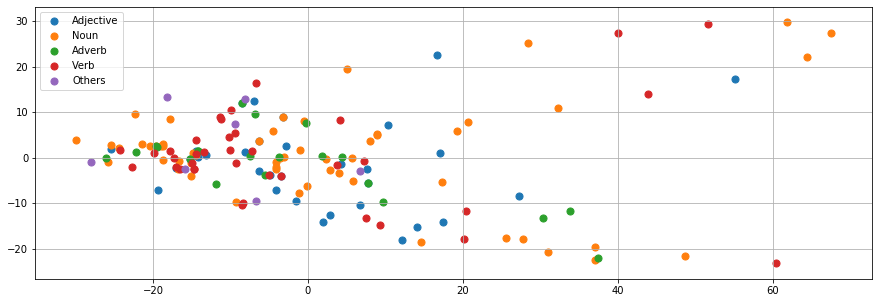

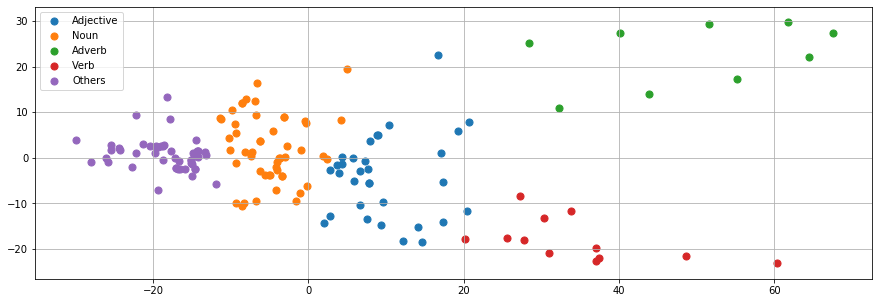

In [0]:

n = 2
k = 2
plot_pred_dim23(n, k, word_vec_dict, Y_pred_dict)


I:\Anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


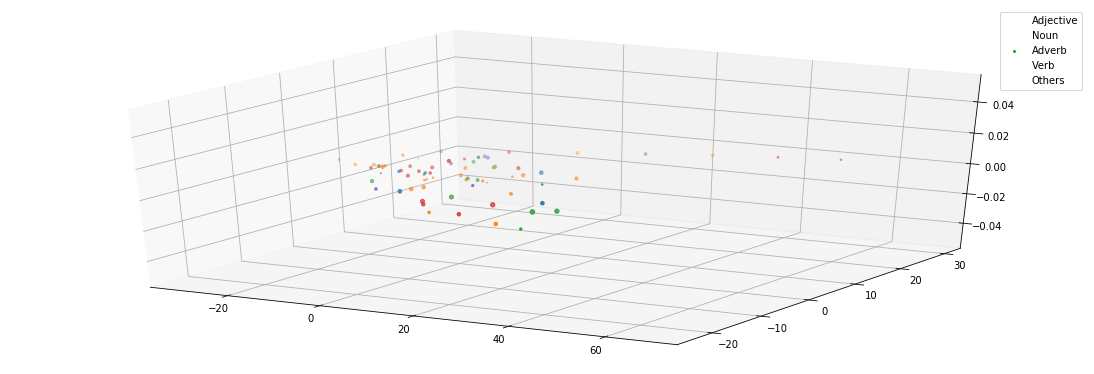

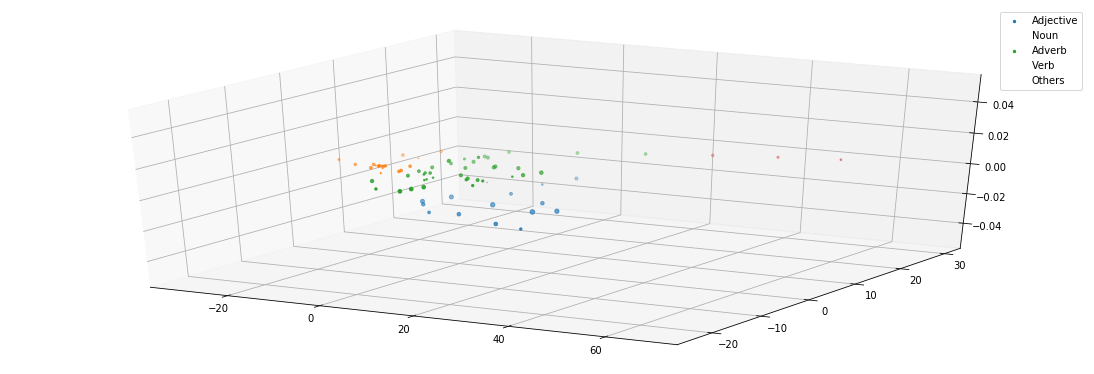

In [0]:

n = 2
k = 3
plot_pred_dim23(n, k, word_vec_dict, Y_pred_dict)


# Neural Network

In [0]:
X_wtv =  np.load('X_wtv.npy')
X_uie = np.load('X_uie.npy')
Y =  np.load('Y.npy')
print(len(X_wtv))
print(X_wtv)
Y_dummy=np.zeros([len(Y), 5])
for i in range(len(Y)):
    Y_dummy[i][Y[i]]=1


799
[[ 1.34912727 -0.88084056  0.34659608 ... -0.37442172  0.52984878
  -0.32649963]
 [-0.56019285 -0.14375893  0.6860622  ... -0.1762621  -0.01699575
   0.28511869]
 [-0.34871328 -0.11358423 -0.10871265 ... -0.29235419 -0.08964806
   0.25570405]
 ...
 [ 0.13370435  0.17308321 -0.60477706 ... -0.08554928  0.29978447
  -0.11194607]
 [-0.38023997  0.07490432 -0.03408224 ... -0.12035727 -0.17593386
  -0.08672527]
 [ 0.14280365  0.89468136 -0.00928262 ...  0.32922915  0.56826869
  -0.42023749]]


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torchviz import make_dot

N_RANGE = [2,3,4,6,8,10]

K_RANGE = [2,3,10,20,30,40]

In [0]:
class multilabel_classifier(nn.Module):
    def __init__(self, D, L, H=10):
        '''
            Setup a network Module.
            
            Args:
                D (int) number of input nodes
                H (int) number of hidden nodes
                L (int) number of output nodes
        '''
        super(multilabel_classifier, self).__init__()

        L_1 = int(L/2)
        L_2 = L - L_1

        self.xtoz = nn.Linear(D, H)
        self.xtoy1 = nn.Linear(D, L_1)
        self.zy1toy2 = nn.Linear(H+L_1, L_2)
       

    def forward(self, x):
        '''
            Defines the forward pass of the network. 
            
            Args:
                x : Tensor of input data
                
            Returns:
                y : Tensor of output data
        '''

        z = F.relu(self.xtoz(x))
        y1 = F.sigmoid(self.xtoy1(x))
        zy1 = torch.cat((y1, z), 1)
        y2 = F.sigmoid(self.zy1toy2(zy1))
        y = torch.cat((y1, y2), 1)
        return y
            

In [0]:
def train(h, X):
    optimizer = optim.Adam(h.parameters(),0.01)
    def my_loss(output, y_variable):
        # print(torch.log(output)).Tensor()
        loss = nn.BCELoss()
        return loss(output, y_variable)

    torch.manual_seed(0)
    np.random.seed(0)

    # Fit the Model
    n_epochs = 20
    for t in range(n_epochs):
        losses = []
        for i in range(len(X)):
            h.train()
            x_variable = Variable(torch.FloatTensor(X[i])).view(1, -1)
            y_variable = Variable(torch.FloatTensor(Y_dummy[i])).view(1, -1)
            output = h(x_variable)

            loss = my_loss(output, y_variable)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.data.mean())
        print('[%d/%d] Loss: %.3f' % (t+1, n_epochs, np.mean(losses)))


In [0]:
def test(h, X_test, Y_test):
    h.eval()
    count = 0
    total_loss = 0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for i in range(len(X_test)):
            x=X_test[i].view(1,-1)
            y=Y_test[i].view(1,-1)
            output = h(x)
            loss = my_loss(output, y)

            total_loss += loss.item()
            count+=1

            _, predicted = output.max(1)

            total += 1
            _,true_value=y.max(1)
            #print(predicted.eq(true_value))
            correct += predicted.eq(true_value).item()
    return total, correct, total_loss

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_uie, Y_dummy, test_size=0.1, random_state=42)        
h1 = multilabel_classifier(len(X_uie[0]), 5)
train(h1, X_uie)
test(h1, Variable(torch.FloatTensor(X_test)), Variable(torch.FloatTensor(Y_test)) )

[1/20] Loss: 0.535
[2/20] Loss: 0.489
[3/20] Loss: 0.483
[4/20] Loss: 0.482
[5/20] Loss: 0.481
[6/20] Loss: 0.481
[7/20] Loss: 0.480
[8/20] Loss: 0.479
[9/20] Loss: 0.479
[10/20] Loss: 0.480
[11/20] Loss: 0.480
[12/20] Loss: 0.479
[13/20] Loss: 0.478
[14/20] Loss: 0.479
[15/20] Loss: 0.477
[16/20] Loss: 0.477
[17/20] Loss: 0.478
[18/20] Loss: 0.476
[19/20] Loss: 0.483
[20/20] Loss: 0.477


(80, 28, 38.18465457856655)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_wtv, Y_dummy, test_size=0.1, random_state=42)        
h2 = multilabel_classifier(len(X_wtv[0]), 5)
train(h2, X_wtv)
test(h2, Variable(torch.FloatTensor(X_test)), Variable(torch.FloatTensor(Y_test)) )

[1/20] Loss: 0.415
[2/20] Loss: 0.373
[3/20] Loss: 0.368
[4/20] Loss: 0.366
[5/20] Loss: 0.364
[6/20] Loss: 0.362
[7/20] Loss: 0.361
[8/20] Loss: 0.360
[9/20] Loss: 0.359
[10/20] Loss: 0.358
[11/20] Loss: 0.357
[12/20] Loss: 0.357
[13/20] Loss: 0.356
[14/20] Loss: 0.355
[15/20] Loss: 0.355
[16/20] Loss: 0.354
[17/20] Loss: 0.354
[18/20] Loss: 0.353
[19/20] Loss: 0.353
[20/20] Loss: 0.352


(80, 49, 25.354648433625698)

In [0]:
# Visualize
#x = torch.randn(1,len(X[0]))
#y = h(x)
#make_dot(y.mean(), params=dict(h.named_parameters()))

## 3.2. Setiment classification

### 2.1. Graph Construction 


In [0]:
np.sum(edge_mat)

1704.0


words = text.split()
words = [word for word in words if word not in stopwords.words('english')]

In [0]:
# flatten the matrix as [x_idx,y_idx, value]

flattened_mat

NameError: name 'flattened_mat' is not defined

In [0]:
import networkx as nx

G0 = nx.Graph()
G0.add_nodes_from(range(len(vertex_list)))

# flatten the matrix as [x_idx,y_idx, value]
XX,YY = np.meshgrid(np.arange(edge_mat.shape[1]),np.arange(edge_mat.shape[0]))
flattened_mat = np.vstack((XX.ravel(), YY.ravel(), edge_mat.ravel())).T

G0.add_weighted_edges_from(flattened_mat)


In [0]:
plt.figure(figsize=(100,60))
plt.show()
nx.draw(G0)


In [0]:
plt.figure(figsize=(100,60))
plt.show()

In [0]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam")      
nx.connected_components(G)

nx.draw(G)
nx.draw_random(G)
nx.draw_circular(G)
nx.draw_spectral(G)
plt.show()

In [0]:
edge_mat

NameError: name 'edge_mat' is not defined